# Lecture 5 

## Randomized algorithms and quicksort.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from auxFileLecture5 import *

Here's a quick-and-dirty implementation of quickSort

In [2]:
def dumbQuickSort(A):
    if len(A) <= 1:
        return A
    L = []
    R = []
    p = choice(range(len(A))) # random pivot
    E = [A[p]] # this is a list of all the things that are equal to the pivot.
    for i in range(len(A)):
        if i == p:
            continue
        if A[i] < A[p]:
            L.append(A[i])
        elif A[i] > A[p]:
            R.append(A[i])
        else:
            E.append(A[i])
    return dumbQuickSort(L) + E + dumbQuickSort(R)

In [3]:
# sanity check
A = [1,4,1,23,6,6,3,2,4]
dumbQuickSort(A)

[1, 1, 2, 3, 4, 4, 6, 6, 23]

And here's are two slicker implementations that don't initialize a separate L and R list.  (So they use less memory).

In [4]:
## First, a few helper functions:

# swap A[i] with A[j]
def swap(A, i, j):
    tmp = A[i]
    A[i] = A[j]
    A[j] = tmp

# Here's one in-place Partition algorithm. This is the one in CLRS
def partition1(A, start, end, p):
    # first put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    # now do the algorithm described in CLRS (see the textbook for explanation)
    i = start - 1
    for j in range(start, end-1):
        if A[j] <= x:
            i += 1
            swap(A, i, j)
    # at this point all of the things <=i are smaller than the pivot, and > i are larger
    # so put the pivot back where it needs to go.
    swap(A, i+1, end-1)
    return i+1


# Here is a different in-place Partition algorithm.  This was the original one introduced by Hoare.
def partition2(A, start, end, p):
    # first swap to put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    # walk pointers up and down the array in opposite directions, switching things until they are in the right place.
    leftP = start
    rightP = end-1 
    while True:
        while leftP < end-1 and A[leftP] <= x:
            leftP += 1
        while rightP > start and A[rightP] >= x:
            rightP -= 1
        if leftP >= rightP:
            break
        # now switch them.
        swap(A, leftP, rightP)
    # now put the pivot value in the right place and return that location
    swap(A, end-1, leftP)
    return leftP
        
# Finally, the quickSort algorithm.  
# In addition to A, it also takes an optional input "partition" which is which partition function to use.
def quickSort(A, partition=partition1):
    return quickSortHelper(A, 0, len(A), partition)
        
def quickSortHelper(A, start, end, partition):
    if end - start <= 1:
        return 
    # choose a random pivot:
    p = choice(range(start, end)) 
    # partition around the pivot:
    pivotLocation = partition( A, start, end, p ) 
    # recurse:
    quickSortHelper(A,start, pivotLocation ,partition)
    quickSortHelper(A,pivotLocation + 1, end, partition)
    return

# define two versions of quicksort, one for each partition function, so we can compare later.
def quickSort1(A):
    return quickSort(A, partition1)
def quickSort2(A):
    return quickSort(A, partition2)

In [5]:
# sanity check
A = [5,4,2,3,1,1,2,3,4,5,234]
quickSort1(A)
print(A)
quickSort2(A)
print(A)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]


Let's compare both our implementations to mergeSort

In [6]:
nVals = range(50, 3050, 100)
nValsMerge, tValsMerge = trySortABunch(mergeSort, Ns=nVals, numTrials=75, listMax=100000)
nValsQuick, tValsQuick = trySortABunch(quickSort1, Ns=nVals, numTrials=75, listMax=100000)
nValsQuick2, tValsQuick2 = trySortABunch(quickSort2, Ns=nVals, numTrials=75, listMax=100000)
nValsQuickDumb, tValsQuickDumb = trySortABunch(dumbQuickSort, Ns=nVals, numTrials=75, listMax=100000)

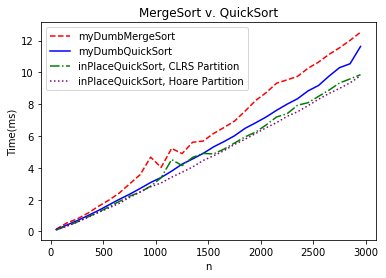

In [7]:
plt.plot( nValsMerge, tValsMerge, "--", color="red", label="myDumbMergeSort" )
plt.plot( nValsQuickDumb, tValsQuickDumb, color="blue", label="myDumbQuickSort" )
plt.plot( nValsQuick, tValsQuick, "-.", color="green", label="inPlaceQuickSort, CLRS Partition" )
plt.plot( nValsQuick2, tValsQuick2, ":", color="purple", label="inPlaceQuickSort, Hoare Partition" )
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("MergeSort v. QuickSort")
plt.show()